In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
plt.style.use('fivethirtyeight')
%matplotlib inline

# Using data collected from coinmarket API on Dec 6 2017, investigate cryptocurrency trends

In [18]:
dec6 = pd.read_csv("coinmarketcap_06122017.csv",index_col=0)
market_cap_raw = dec6[['id','market_cap_usd']].copy()
market_cap_raw

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
...,...,...
1321,turbocoin,NaN
1322,birds,NaN
1323,bitcoincashscrypt,NaN
1324,swisscoin,NaN


In [8]:
dec6

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10


In [19]:
market_cap_raw.nunique()

id                1326
market_cap_usd    1031
dtype: int64

In [20]:
market_cap_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1325
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1326 non-null   object 
 1   market_cap_usd  1031 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [21]:
market_cap_raw.dropna(inplace=True)
market_cap_raw.nunique()

id                1031
market_cap_usd    1031
dtype: int64

In [25]:
top_10 = market_cap_raw.head(10)
top_10

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
5,dash,5.794076e+09
6,litecoin,5.634498e+09
7,bitcoin-gold,4.920065e+09
8,monero,4.331688e+09
9,cardano,3.231420e+09


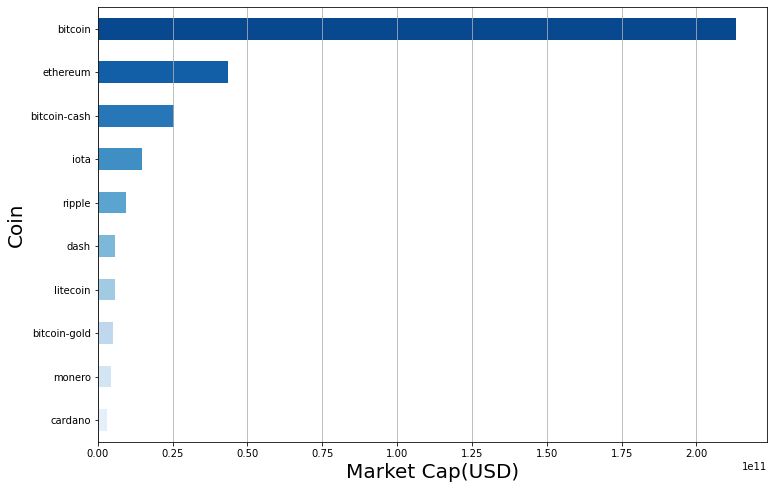

In [36]:
fig,ax = plt.subplots(figsize=(12,8))
top_10[::-1].plot(x='id',y='market_cap_usd',kind='barh',ax=ax,color=sns.color_palette('Blues',10),legend=False)
ax.set_ylabel("Coin",fontsize=20)
ax.set_xlabel("Market Cap(USD)",fontsize=20)
ax.grid(axis='x')

In [95]:
top_10_perc = top_10.assign(market_cap_perc=(top_10['market_cap_usd']/market_cap_raw['market_cap_usd'].sum()).mul(100))

In [41]:
from matplotlib.ticker import PercentFormatter

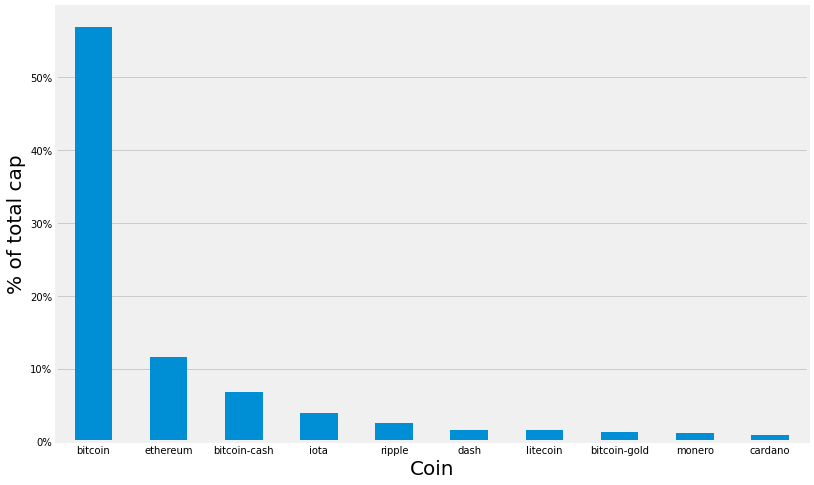

In [96]:
fig,ax = plt.subplots(figsize=(12,8))
top_10_perc.plot(x='id',y='market_cap_perc',kind='bar',ax=ax,legend=False)
ax.set_xlabel("Coin",fontsize=20)
ax.set_ylabel("% of total cap",fontsize=20)
ax.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(rotation=0)
ax.grid(axis='x')

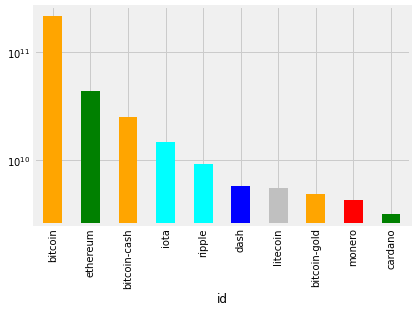

In [97]:
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']
top_10_perc.plot(x='id',y='market_cap_usd',kind='bar',logy=True,color=COLORS,legend=False)
ax.set_ylabel("USD");

In [63]:
volatility = dec6[['id','percent_change_24h','percent_change_7d']]
volatility =volatility.dropna().set_index('id')
volatility = volatility.sort_values(by='percent_change_24h')
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


# Top 10 Gainers and Top 10 Losers in the Past 24 Hours

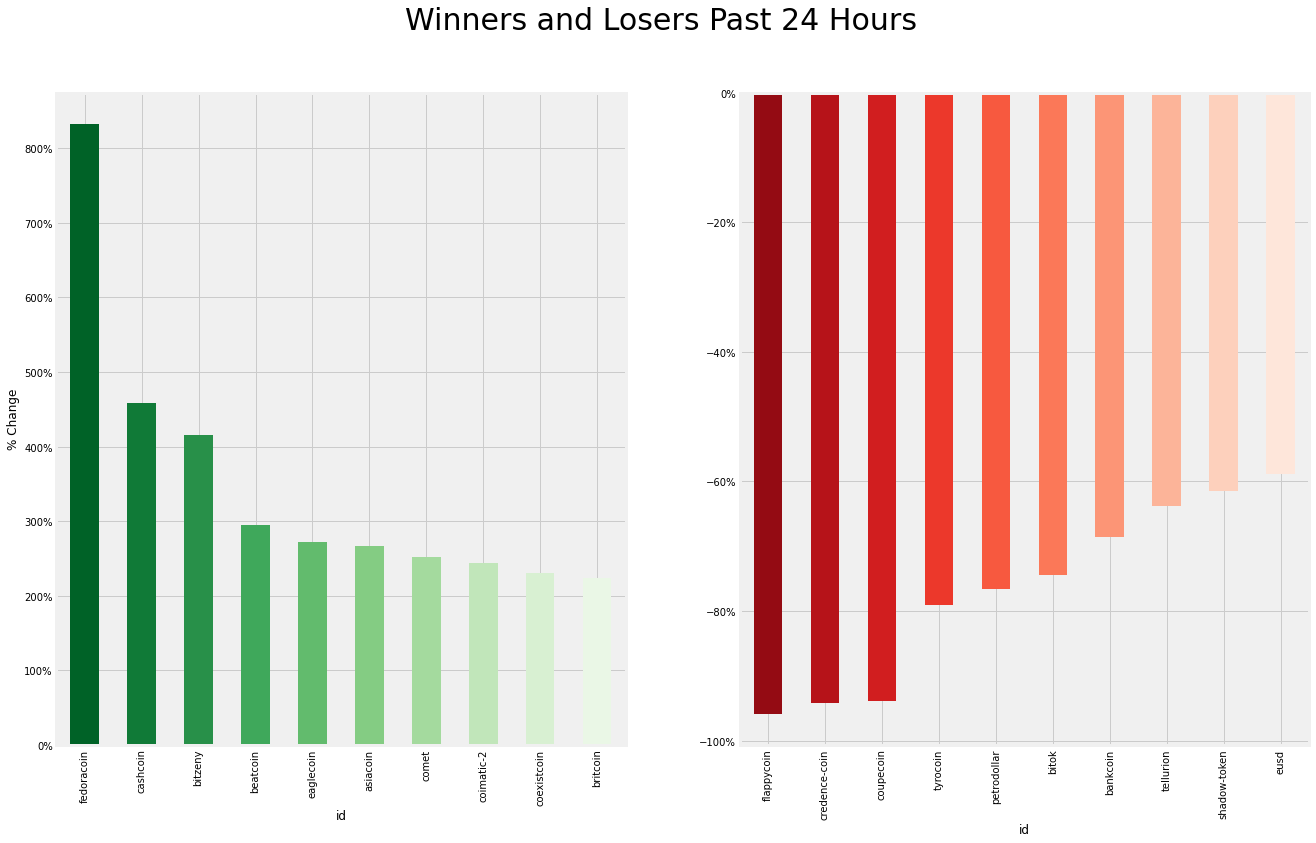

In [85]:
def make_winner_loser_plot(data,n,title):
    fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(20,12))
    ax0.set_ylabel("% Change")
    
    data.tail(n)[::-1].plot(kind='bar',ax=ax0,color=sns.color_palette('Greens_r',n))
    data.head(n).plot(kind='bar',ax=ax1,color=sns.color_palette('Reds_r',n))
    for ax in (ax0,ax1):
        #ax.tick_params(rotation=0)
        ax.yaxis.set_major_formatter(PercentFormatter())
    fig.suptitle(title,fontsize=30)
figure_title = "Winners and Losers Past 24 Hours"
make_winner_loser_plot(volatility.percent_change_24h,10,figure_title)

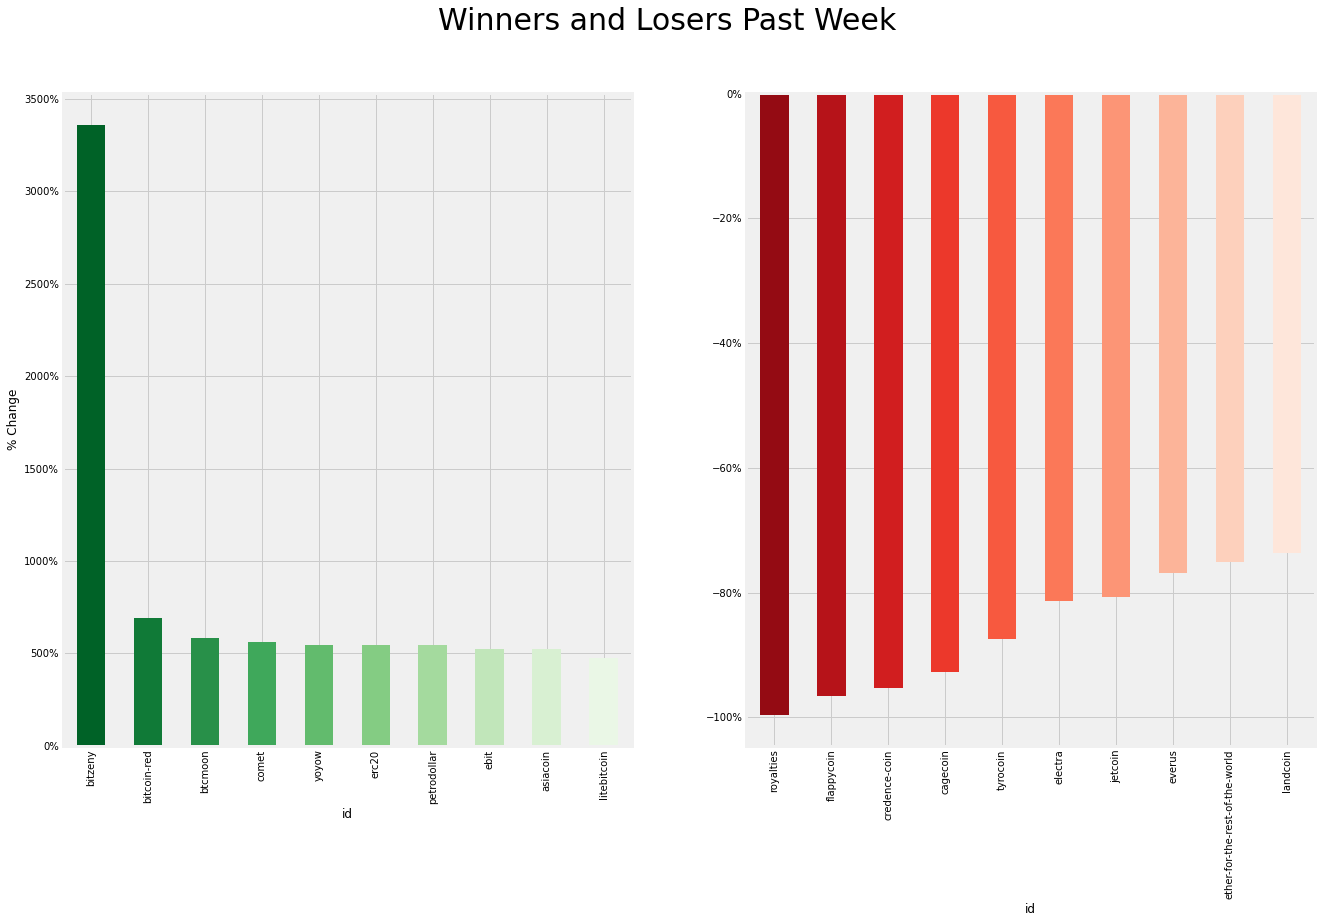

In [90]:
volatility_7d = volatility.sort_values(by='percent_change_7d')
figure_title = "Winners and Losers Past Week"
make_winner_loser_plot(volatility_7d.percent_change_7d,10,figure_title)

In [92]:
dec6.market_cap_usd.nlargest(10)

0    2.130493e+11
1    4.352945e+10
2    2.529585e+10
3    1.475225e+10
4    9.365343e+09
5    5.794076e+09
6    5.634498e+09
7    4.920065e+09
8    4.331688e+09
9    3.231420e+09
Name: market_cap_usd, dtype: float64

In [94]:
largecaps = dec6[dec6.market_cap_usd > 1e10]
largecaps

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.50000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.65200,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.09000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.30746,4,MIOTA,2.779530e+09


<BarContainer object of 3 artists>

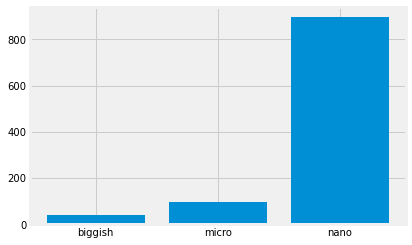

In [99]:
biggish = (dec6.market_cap_usd > 3e8).sum()
micro = ((dec6.market_cap_usd >=5e7) & (dec6.market_cap_usd <= 3e8)).sum()
nano = (dec6.market_cap_usd < 5e7).sum()

values = [biggish,micro,nano]

plt.bar(['biggish','micro','nano'],values)

In [103]:
dec6.market_cap_usd.plot

0       2.130493e+11
1       4.352945e+10
2       2.529585e+10
3       1.475225e+10
4       9.365343e+09
            ...     
1321             NaN
1322             NaN
1323             NaN
1324             NaN
1325             NaN
Name: market_cap_usd, Length: 1326, dtype: float64

<AxesSubplot:>

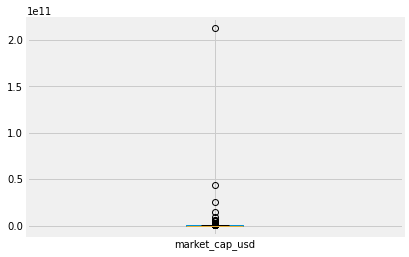

In [105]:
dec6.market_cap_usd.plot(kind='box')

<AxesSubplot:xlabel='market_cap_usd', ylabel='Count'>

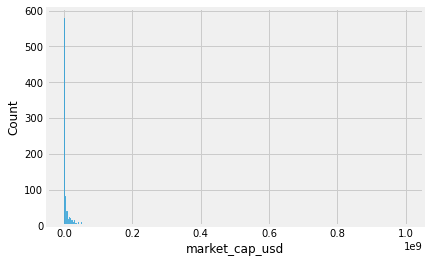

In [111]:
sns.histplot(dec6.market_cap_usd,binrange=[0,1e9])

In [112]:
dec6.market_cap_usd.describe()

count    1.031000e+03
mean     3.630503e+08
std      6.844947e+09
min      1.000000e+01
25%      1.880625e+05
50%      1.488564e+06
75%      1.546756e+07
max      2.130493e+11
Name: market_cap_usd, dtype: float64